In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/Users/Suganya/Downloads/questions.csv")

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [5]:
df.drop(['id', 'qid1', 'qid2'],axis=1,inplace=True)

In [6]:
df

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404346,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,What is one coin?,What's this coin?,0
404349,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


<AxesSubplot:xlabel='is_duplicate'>

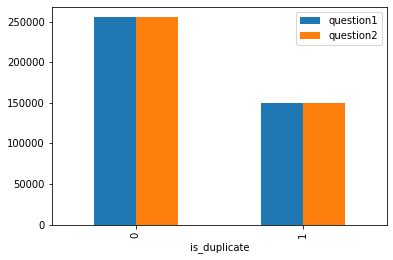

In [7]:
df.groupby('is_duplicate').count().plot.bar()

In [8]:
df.shape

(404351, 3)

In [9]:
df.isna().sum().sort_values(ascending=True)

is_duplicate    0
question1       1
question2       2
dtype: int64

In [10]:
df=df.fillna("")

In [11]:
df.isna().sum().sort_values(ascending=True)

question1       0
question2       0
is_duplicate    0
dtype: int64

In [12]:
df['q1_length'] = df.question1.apply(lambda x: len(str(x)))
df['q2_length'] = df.question2.apply(lambda x: len(str(x)))

In [13]:
df.head()

,question1,question2,is_duplicate,q1_length,q2_length
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39


In [14]:
df['question_len_diff'] = abs(df.q2_length - df.q1_length)

In [15]:
df.head()

,question1,question2,is_duplicate,q1_length,q2_length,question_len_diff
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,9
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,37
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,15
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,37


In [16]:
df['len_common_words'] = df.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)

In [17]:
df.head()

,question1,question2,is_duplicate,q1_length,q2_length,question_len_diff,len_common_words
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,9,10
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,37,4
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,4
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,15,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,37,2


In [18]:
train_dataset=df.drop(['question1','question2'], axis=1)

In [19]:
y = train_dataset.iloc[:,0]
X = train_dataset.iloc[:,1:5]

In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_duplicate, dtype: int64

In [21]:
X.head()

,q1_length,q2_length,question_len_diff,len_common_words
0,66,57,9,10
1,51,88,37,4
2,73,59,14,4
3,50,65,15,0
4,76,39,37,2


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
from xgboost import XGBClassifier

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [25]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     63721
           1       0.58      0.68      0.63     37367

    accuracy                           0.70    101088
   macro avg       0.69      0.70      0.69    101088
weighted avg       0.72      0.70      0.71    101088

70.31% Accurate


In [26]:
from sklearn.naive_bayes import BernoulliNB
bern_model = BernoulliNB()
bern_model.fit(X_train, y_train)
y_pred = bern_model.predict(X_test)
print("Accuracy of model: ", round(accuracy_score(y_test, y_pred)*100,2))
print(classification_report(y_pred, y_test))

Accuracy of model:  63.04
              precision    recall  f1-score   support

           0       1.00      0.63      0.77    101088
           1       0.00      0.00      0.00         0

    accuracy                           0.63    101088
   macro avg       0.50      0.32      0.39    101088
weighted avg       1.00      0.63      0.77    101088



/opt/anaconda3/envs/sugi/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/sugi/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/sugi/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
